In [1]:
# Import required libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from stock_price_forecast.data import get_inputs
from stock_price_forecast.preprocess import Preprocess

In [2]:
trained_model = tf.keras.models.load_model('../saved_data/model')

In [3]:
dataset = pd.read_csv('../data/BA daily.csv')
dataset.set_index(pd.to_datetime(dataset["Date"], format="%m/%d/%Y"), inplace = True)
dataset.drop(columns = ["Date", "Adj Close", "Volume"], inplace = True)

prep = Preprocess(p=5, t=250, valid_ratio=0.10)
prep.fit(dataset)
x_train, y_train, x_valid, y_valid, x_train_indeces, x_valid_indeces, y_train_indeces, y_valid_indeces = prep.transform(dataset)

Number of time steps in one entry:  250
Number of predictions in one entry:  5
Total length of one entry:  255
Total number of samples:  9170
Number of samples in training set:  8253
Number of samples in validation set:  917
Training dataset shape:  (8253, 250, 4)
Validation dataset shape:  (917, 250, 4)
Training labels shape:  (8253, 5, 4)
Validation labels shape:  (917, 5, 4)


In [24]:
def predict(x_test, y_test, indeces_x, indeces_y, model):

    pred = model.predict(x_test)
    error = {}

    prices = ["Open", "High", "Low", "Close"]

    n = x_test.shape[0] + x_test.shape[1]
    fig, axes = plt.subplots(len(prices), 1, figsize=(18, 6 * len(prices)))
    for i, price in zip(range(y_test.shape[2]), prices):
        error[price] = np.sum((y_test[:, :, i] - pred[:, :, i])**2) / n
        for j in range(x_test.shape[0]):
            axes[i].scatter(np.hstack((indeces_x[j, :], indeces_y[j, :])), np.hstack((x_test[j, :, i], y_test[j, :, i])), s = 25, 
            c = '#BD9DEA', edgecolors = "black", linewidths = 0.2)
            axes[i].scatter(indeces_y[j, :], pred[j, :, i], s = 25, c = '#F2C76E', edgecolors = "black", linewidths = 0.2)
            axes[i].set_title("Comparison of actual and predicted " + str(price) + " stock prices")
        axes[i].legend(["Actual", "Predicted"])
        axes[i].grid(linewidth = 0.1, color = "#000000")
    plt.show()
    
    return error

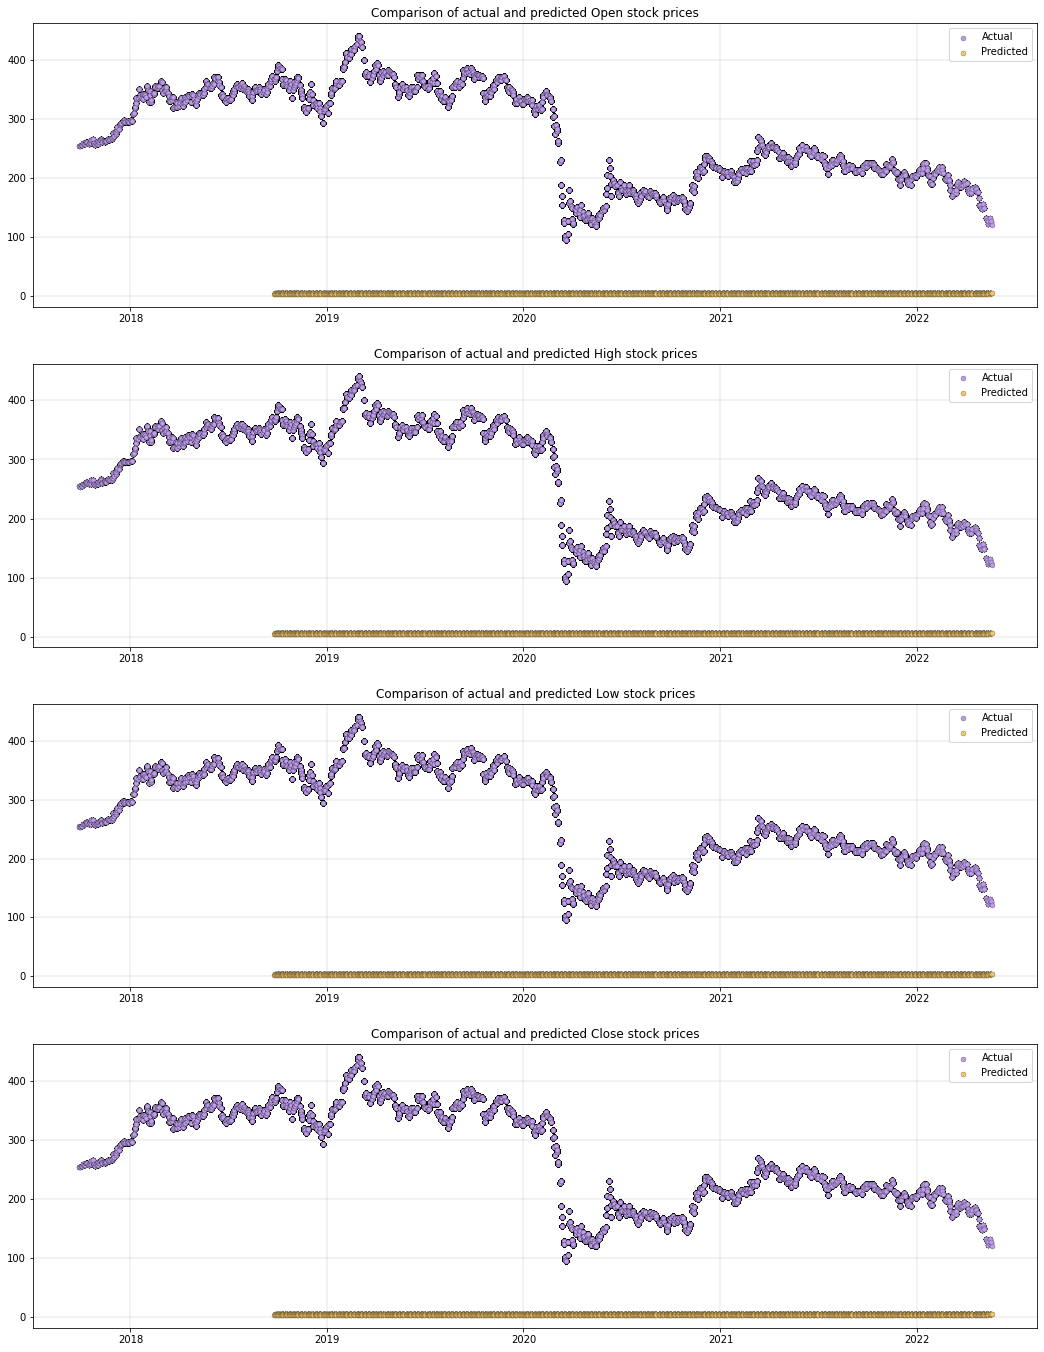

In [25]:
error = predict(x_valid, y_valid, x_valid_indeces, y_valid_indeces, trained_model)

In [68]:
def predict(x_test, y_test, indeces_x, indeces_y, model):

    pred = model.predict(x_test)
    error = {}

    prices = ["Open", "High", "Low", "Close"]
    colors = ['#BD9DEA', '#EA7186', '#F2C76E', '#7A77B9']

    step = 50
    index_list = np.arange(0, len(x_test), step)

    n = x_test.shape[0] + x_test.shape[1]
    fig, axes = plt.subplots(len(index_list), 1, figsize=(18, 4 * len(index_list)))
    for i, price, color in zip(range(y_test.shape[2]), prices, colors):
        error[price] = np.sum((y_test[:, :, i] - pred[:, :, i])**2) / n
        for j, gr in zip(index_list, range(len(index_list))):
            axes[gr].plot(np.hstack((indeces_x[j, 230:], indeces_y[j, :])), np.hstack((x_test[j, 230:, i], pred[j, :, i])), color = color)
            axes[gr].plot(np.hstack((indeces_x[j, 230:], indeces_y[j, :])), np.hstack((x_test[j, 230:, i], y_test[j, :, i])), color = color)
            axes[gr].grid(linewidth = 0.1, color = "#000000")
            axes[gr].legend(prices)
    plt.show()
    
    return error

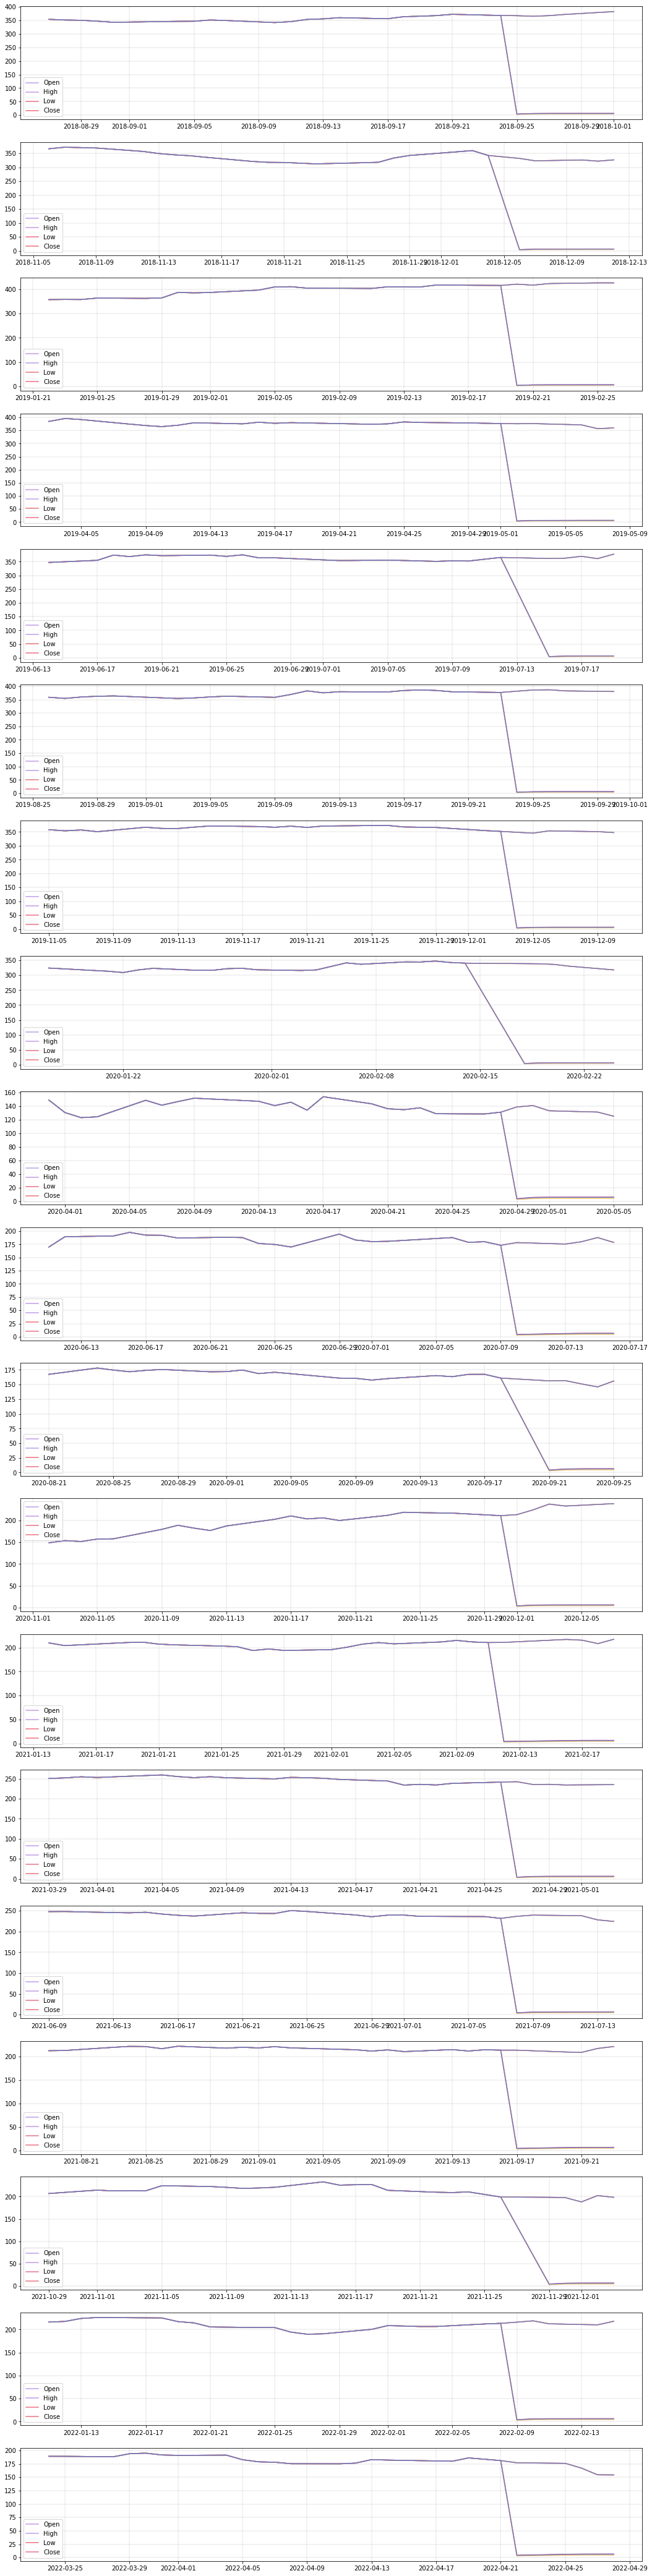

In [69]:
error = predict(x_valid, y_valid, x_valid_indeces, y_valid_indeces, trained_model)